In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
edu = pd.read_csv('./educ_figdp_1_Data.csv', na_values = ':',
usecols = ["TIME","GEO","Value"])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [5]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [6]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [7]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [8]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [9]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [12]:
edu.loc[90:94, ['TIME','GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [13]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [14]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [15]:
edu.max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [20]:
print ("Pandas max function:", edu['Value'].max() )
print ("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


In [21]:
s = edu["Value"]/100 
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [22]:
s = edu["Value"].apply(np.sqrt) 
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [23]:
s = edu["Value"].apply(lambda d: d**2) 
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [24]:
edu['ValueNorm'] = edu['Value']/edu['Value'].max() 
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [25]:
edu.drop('ValueNorm', axis = 1, inplace = True) 
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [53]:
edu = edu.append({"TIME": 2000,"Value": 5.00,"GEO": 'a'}, ignore_index = True)
edu.tail()

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_48512/1332187739.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edu = edu.append({"TIME": 2000,"Value": 5.00,"GEO": 'a'}, ignore_index = True)


,TIME,GEO,Value
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00
385,2000,a,5.00


In [55]:
edu.drop(max(edu.index), axis = 0, inplace = True) 
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [57]:
#eduDrop = edu.drop(edu["Value"].isnull(), axis = 0) 
#eduDrop.head()

In [30]:
eduDrop = edu.dropna(how = 'any', subset = ["Value"]) 
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [31]:
eduFilled = edu.fillna(value = {"Value": 0}) 
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [32]:
edu.sort_values(by = 'Value', ascending = False, inplace = True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [33]:
edu.sort_index(axis = 0, ascending = True, inplace = True) 
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [35]:
group = edu[["GEO", "Value"]].groupby('GEO').mean() 
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [36]:
filtered_data = edu[edu["TIME"] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
index = ['GEO'], columns = ['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [41]:
pivedu.loc[['Spain','Portugal'], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [42]:
pivedu = pivedu.drop([
                        'Euro area (13 countries)', 
                        'Euro area (15 countries)', 
                        'Euro area (17 countries)', 
                        'Euro area (18 countries)', 
                        'European Union (25 countries)', 
                        'European Union (27 countries)', 
                        'European Union (28 countries)'
                    ],
                    axis = 0)
pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending = False, method = 'first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [43]:
totalSum = pivedu.sum(axis = 1) 
totalSum.rank(ascending = False, method = 'dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

<AxesSubplot:title={'center':'Total Values for Country'}, xlabel='GEO'>

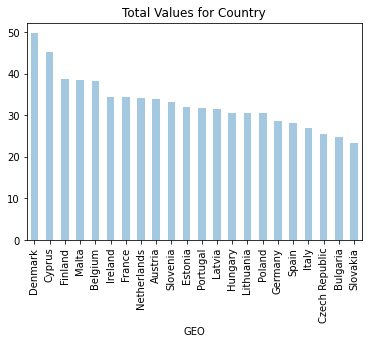

In [48]:
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = 'bar', style = 'b', alpha = 0.4, 
              title = "Total Values for Country")

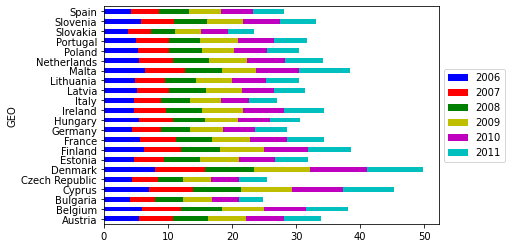

In [50]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c'] 
ax = pivedu.plot(kind = 'barh',stacked = True,color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))